# Importing Necessary Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.PURPLE + 'Hello World !' + color.END)

Hello World !


# Importing Dataset

In [45]:
df = pd.read_csv('/content/credit_card.csv')

In [46]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [47]:
for i in df.columns:
    if len(df[i].value_counts()) == df.shape[0]:
        print(i)

CUST_ID


In [48]:
df = df.drop(columns='CUST_ID')

In [49]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Required pre-processing....

In [50]:
df.isna().sum()/df.shape[0]

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000112
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.034972
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [51]:
for i in df.columns:
  print(df[i].value_counts())

0.000000       80
1100.941072     1
40.074484       1
2093.844656     1
179.765708      1
               ..
1139.691004     1
3494.152843     1
2388.503738     1
2153.498372     1
510.233775      1
Name: BALANCE, Length: 8871, dtype: int64
1.000000    6211
0.909091     410
0.818182     278
0.727273     223
0.545455     219
0.636364     209
0.454545     172
0.363636     170
0.272727     151
0.181818     146
0.000000      80
0.090909      67
0.833333      60
0.875000      57
0.900000      55
0.888889      53
0.857143      51
0.500000      40
0.666667      37
0.333333      22
0.777778      22
0.800000      20
0.571429      19
0.750000      17
0.714286      15
0.700000      13
0.625000      11
0.400000      10
0.555556      10
0.300000       9
0.200000       9
0.375000       9
0.125000       9
0.285714       8
0.100000       8
0.250000       8
0.444444       7
0.166667       7
0.142857       7
0.600000       6
0.111111       5
0.222222       5
0.428571       5
Name: BALANCE_FREQUENCY, dtyp

In [52]:
ls = []
for i in df['MINIMUM_PAYMENTS']:
  if str(i)==str(df[df['MINIMUM_PAYMENTS'].isna()==True]['MINIMUM_PAYMENTS'].iloc[1]):
    ls.append(df['MINIMUM_PAYMENTS'].mode()[0])
  else:
    ls.append(i)

In [53]:
df[df['MINIMUM_PAYMENTS'].isna()==True]['MINIMUM_PAYMENTS'].iloc[1]

nan

In [54]:
len(ls)

8950

In [55]:
df['MINIMUM_PAYMENTS'] = ls

In [56]:
ls = []
for i in df['CREDIT_LIMIT']:
  if str(i)==str(df[df['CREDIT_LIMIT'].isna()==True]['CREDIT_LIMIT'].iloc[0]):
    ls.append(df['CREDIT_LIMIT'].mode()[0])
  else:
    ls.append(i)

In [57]:
df['CREDIT_LIMIT'] = ls

In [58]:
df.isna().sum()/df.shape[0]

BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

In [59]:
for i in df.columns:
  mean = np.mean(df[i])
  std = np.std(df[i])
  print(color.YELLOW,f'mean of the {i} is', mean,color.END)
  print("-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-")
  print("-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-")


 mean of the BALANCE is 1564.4748276781038 
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
 mean of the BALANCE_FREQUENCY is 0.8772707255865991 
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
 mean of the PURCHASES is 1003.2048335195564 
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
 mean of the ONEOFF_PURCHASES is 592.437370949722 
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
 mean of the INSTALLMENTS_PURCHASES is 411.06764469273713 
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
 mean of the CASH_ADVANCE is 978.8711124654749 
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
 mean of the PURCHASES_FREQUENCY is 0.4903505483798885 
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
 mean of the ONEOFF_PURCHASES_FREQUENCY is 0.20245768357542138 
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
-+_+_+_+_+_+__+_+_+_+_+__+_+_+_-
 mean of the PURCHASES_INSTALLMENTS_FREQUENCY is 0

In [60]:
from scipy.stats import zscore
zs = zscore(df)

In [61]:
abszs = np.abs(zs)

In [62]:
fltr = (abszs < 3).all(axis=1)

In [63]:
df = df[fltr]

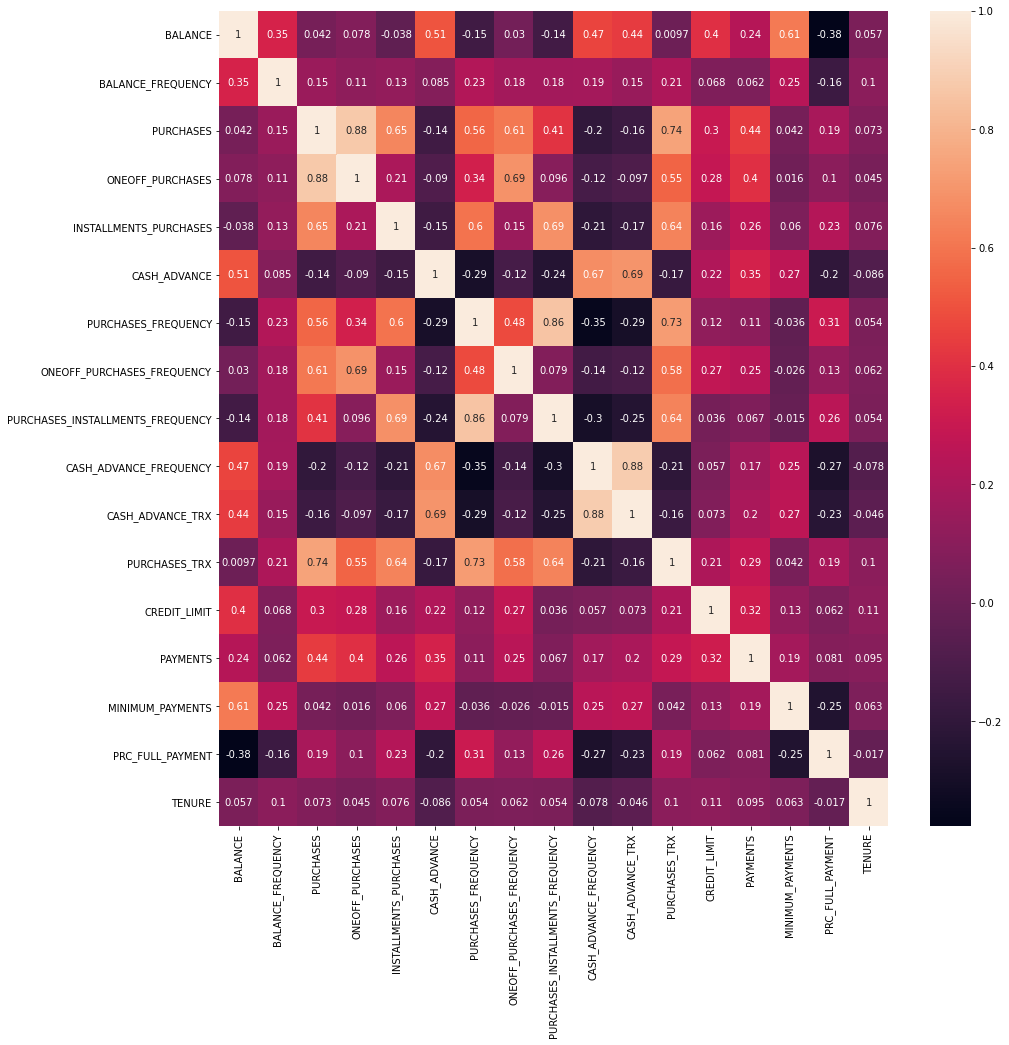

In [64]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [65]:
corr_matrix = df.corr().abs()

In [66]:
corr_matrix

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.349404,0.042223,0.078321,0.037524,0.509312,0.145517,0.029860,0.139821,0.466543,0.435774,0.009701,0.400751,0.240485,0.613979,0.377288,0.057468
BALANCE_FREQUENCY,0.349404,1.000000,0.152808,0.113488,0.131446,0.085043,0.226480,0.178007,0.177131,0.186005,0.147070,0.210446,0.067577,0.061599,0.245783,0.159424,0.104624
PURCHASES,0.042223,0.152808,1.000000,0.875720,0.652988,0.143448,0.555402,0.611340,0.412956,0.197785,0.158409,0.744789,0.298157,0.438270,0.042090,0.194430,0.072604
ONEOFF_PURCHASES,0.078321,0.113488,0.875720,1.000000,0.206243,0.089704,0.337738,0.692882,0.095937,0.122729,0.097218,0.552959,0.284639,0.401436,0.016201,0.102127,0.045241
INSTALLMENTS_PURCHASES,0.037524,0.131446,0.652988,0.206243,1.000000,0.150261,0.596025,0.152086,0.686644,0.208456,0.168699,0.642291,0.157688,0.258346,0.059759,0.233630,0.076047
CASH_ADVANCE,0.509312,0.085043,0.143448,0.089704,0.150261,1.000000,0.287348,0.123338,0.238911,0.671845,0.694980,0.173397,0.221555,0.345054,0.268144,0.203739,0.086218
PURCHASES_FREQUENCY,0.145517,0.226480,0.555402,0.337738,0.596025,0.287348,1.000000,0.478305,0.855422,0.354882,0.293949,0.725113,0.118490,0.108915,0.036426,0.307606,0.053851
ONEOFF_PURCHASES_FREQUENCY,0.029860,0.178007,0.611340,0.692882,0.152086,0.123338,0.478305,1.000000,0.078747,0.139606,0.116999,0.582221,0.274026,0.247869,0.025753,0.129034,0.061977
PURCHASES_INSTALLMENTS_FREQUENCY,0.139821,0.177131,0.412956,0.095937,0.686644,0.238911,0.855422,0.078747,1.000000,0.295972,0.245211,0.643047,0.035968,0.066594,0.014938,0.256354,0.054076
CASH_ADVANCE_FREQUENCY,0.466543,0.186005,0.197785,0.122729,0.208456,0.671845,0.354882,0.139606,0.295972,1.000000,0.882863,0.205582,0.056598,0.173954,0.249796,0.272413,0.078395


In [67]:
df1 = pd.concat([df.iloc[:,:-1],pd.get_dummies(df['TENURE'],drop_first=False)],axis = 1)

In [70]:
ls = []
for i in corr_matrix.columns:
  n = 0
  for j in corr_matrix[i]:
    if j>.75:
      n += 1
  if n!=0:
    ls.append(i)
if len(ls) == df.shape[1]:
  print('Multicollinearity is present.')

Multicollinearity is present.


In [72]:
df1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,8,9,10,11,12
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,0,0,0,0,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,0,0,0,0,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,0,0,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,299.351881,0.000000,0,0,0,0,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,121.294493,0.750000,385.26,385.26,0.00,169.554775,0.500000,0.500000,0.000000,0.125000,3,7,500.0,98.225317,113.944625,0.000000,1,0,0,0,0
8877,55.147722,0.875000,163.31,0.00,163.31,0.000000,0.875000,0.000000,0.750000,0.000000,0,7,1000.0,62.619008,109.580539,0.000000,1,0,0,0,0
8878,869.328293,0.750000,0.00,0.00,0.00,1153.925205,0.000000,0.000000,0.000000,0.125000,3,0,1200.0,150.755024,337.986933,0.000000,1,0,0,0,0
8879,137.744895,1.000000,441.00,0.00,441.00,0.000000,0.750000,0.000000,0.625000,0.000000,0,6,1000.0,169.249683,124.639905,0.000000,1,0,0,0,0


# Given the data possesses Multicollinearity and a hefty columnar size, Principle Component Analysis is performed.

In [73]:
from sklearn.decomposition import PCA

In [74]:
pcfnc = PCA()

In [75]:
dfpc = pcfnc.fit_transform(df)

In [76]:
pcfnc.explained_variance_ratio_.cumsum()

array([0.57163333, 0.73118843, 0.86076446, 0.93087415, 0.96628912,
       0.98521477, 0.99999287, 0.99999823, 0.9999995 , 0.99999995,
       0.99999998, 0.99999999, 0.99999999, 1.        , 1.        ,
       1.        , 1.        ])

In [77]:
pcdf = pd.DataFrame(dfpc)[[0,1,2,3,4]]

In [78]:
pcdf

,0,1,2,3,4
0,-3542.619587,-497.211225,-430.686116,164.529385,17.747450
1,4504.464591,4493.117867,235.102203,3480.538710,-1465.766899
2,3334.406474,-826.246072,-1328.594304,-967.854279,236.324903
3,3148.166124,-1678.298183,-1023.728676,-1067.690837,-918.887474
4,-3062.748418,121.559197,-313.152018,-41.403917,383.328855
...,...,...,...,...,...
7429,-3916.452250,-298.314443,-158.795373,-89.135214,-407.958956
7430,-3559.400847,-545.876975,-489.877357,79.734186,-82.533943
7431,-3002.205701,672.141548,-772.742293,296.813133,-550.364778
7432,-3473.931010,-515.313887,-246.635379,-73.123270,-141.294020


# Finally....

In [79]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
from yellowbrick.cluster import SilhouetteVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [80]:
sse = []
sil = []
dbl = []
chl = []
for i in range(2,10):
    km = KMeans(n_clusters=i,n_init=25,init='k-means++',max_iter=1000,random_state=123).fit(pcdf)
    silsc = silhouette_score(X=df,
                                labels=km.labels_,metric='euclidean',
                                                                  random_state=123)
    dbsc = davies_bouldin_score(X=df,labels=km.labels_)
    chsc = calinski_harabasz_score(X=df,labels=km.labels_)
    c = km.inertia_
    print(color.BOLD,i,color.UNDERLINE,color.END)
    print(color.BOLD,color.PURPLE,'The silhouette score when no.of cluster is',i,'is',silsc,color.END)
    print(color.BOLD,color.CYAN,'The davis_bouldin score when no.of cluster is',i,'is',dbsc,color.END)
    print(color.BOLD,color.YELLOW,'The calinski_harabasz score when no.of cluster is',i,'is',chsc,color.END)
    sse.append(c)
    sil.append(silsc)
    dbl.append(dbsc)
    chl.append(chsc)

 2  
  The silhouette score when no.of cluster is 2 is 0.44466319539240085 
  The davis_bouldin score when no.of cluster is 2 is 1.0963133856471503 
  The calinski_harabasz score when no.of cluster is 2 is 5191.868057423974 
 3  
  The silhouette score when no.of cluster is 3 is 0.4324586035839137 
  The davis_bouldin score when no.of cluster is 3 is 1.3861344982283066 
  The calinski_harabasz score when no.of cluster is 3 is 3762.8967196956487 
 4  
  The silhouette score when no.of cluster is 4 is 0.3596617095885151 
  The davis_bouldin score when no.of cluster is 4 is 1.316724172331103 
  The calinski_harabasz score when no.of cluster is 4 is 3232.3325773370734 
 5  
  The silhouette score when no.of cluster is 5 is 0.3450689463733642 
  The davis_bouldin score when no.of cluster is 5 is 1.298570600442705 
  The calinski_harabasz score when no.of cluster is 5 is 2921.668483753026 
 6  
  The silhouette score when no.of cluster is 6 is 0.3292012856653638 
  The davis_bouldin score wh

# Using 3 well-known clustering indices the respective plots are crafted.

Text(0, 0.5, 'Inertia')

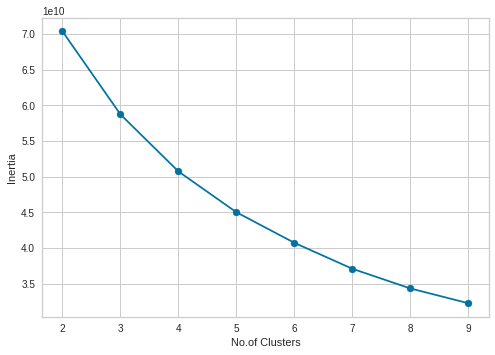

In [81]:
plt.plot(range(2,10),sse)
plt.scatter(range(2,10),sse)
plt.xlabel('No.of Clusters')

plt.ylabel('Inertia')

Text(0, 0.5, 'Calinski-Harabasz Score')

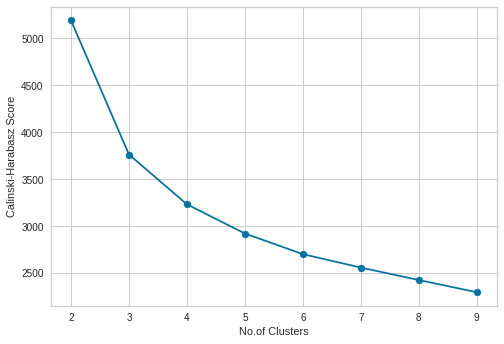

In [82]:
plt.plot(range(2,10),chl)
plt.scatter(range(2,10),chl)
plt.xlabel('No.of Clusters')
plt.ylabel('Calinski-Harabasz Score')

Text(0, 0.5, 'Silhoutee Score')

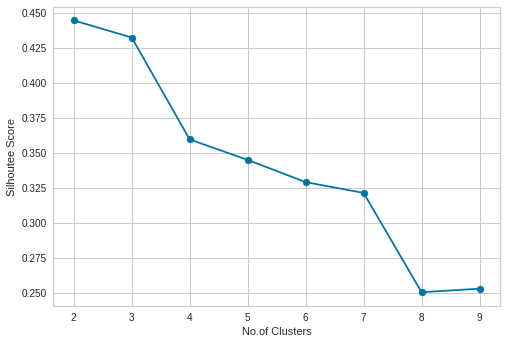

In [83]:
plt.plot(range(2,10),sil)
plt.scatter(range(2,10),sil)
plt.xlabel('No.of Clusters')
plt.ylabel('Silhoutee Score')

Text(0, 0.5, 'Davis-Bouldin Score')

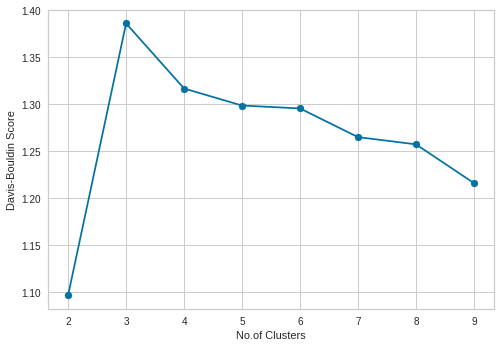

In [84]:
plt.plot(range(2,10),dbl)
plt.scatter(range(2,10),dbl)
plt.xlabel('No.of Clusters')
plt.ylabel('Davis-Bouldin Score')

# Using elbow-method the following 'k' value is determined

In [109]:
km = KMeans(n_clusters=4,n_init=25,init='k-means++',max_iter=1000,random_state=123).fit(pcdf)

In [110]:
df['lab'] = km.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


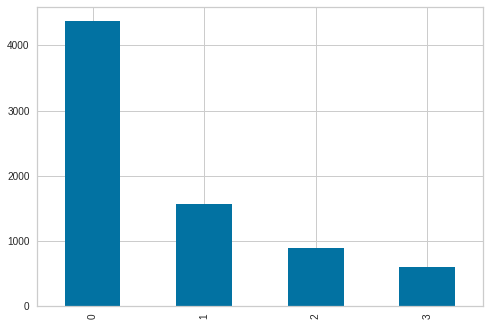

In [111]:
df['lab'].value_counts().plot(kind='bar')

In [112]:
dfin = df.drop(columns=['lab'])

In [113]:
vslzr = SilhouetteVisualizer(model = km, colors = 'yellowbrick')

# Hence, among a list of 'k' values, '4'  is determined to be with the most no. of datapoints that crosses the avg. silhoutte score in each cluster. 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9016a0a90>,
                     model=None)

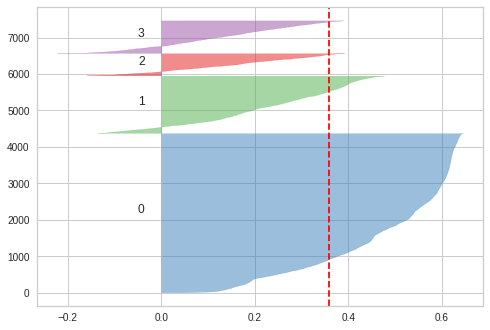

In [114]:
vslzr.fit(df)